# Import library and sorce codes

## Import library

In [1]:
import pandas as pd
from pymatgen import core
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
import matplotlib.pyplot as plt


## Import sorce codes

In [2]:
import src.preprocess_func as preprocess
import src.training_model as training
import src.plotting as plotting
import src.Variable_generator as vg

# Preprocess data

In [3]:
# filename = 'https://drive.google.com/uc?id=1-2Ia30pDDiRgof0FFinN4EQ-1BN24qld&export=download'
filename = 'srf/SM_FT_dataset.csv'
df = pd.read_csv(filename,index_col=0)

comps = [core.Composition(x) for x in df['Composition']]
dset = preprocess.data_generator(comps)
Training_sequences = dset.real_data # X_train
Elements_sequences = dset.elements #input elements sequence

properties_values = df.iloc[:,1:].values.astype('float32') # Y_train
scaler = StandardScaler() # Standard_scaler
properties_values_scaled = scaler.fit_transform(properties_values) # Scaled Y_train


# Train models

## Surrogate model

In [4]:
surrogate_model=training.training_surrogate_ANN(Training_sequences,properties_values_scaled)

  0%|          | 0/2000 [00:00<?, ?it/s]

epoch: 100, Loss:0.962864339351654
epoch: 200, Loss:0.2147091031074524
epoch: 300, Loss:0.1275530308485031
epoch: 400, Loss:0.1199006587266922
epoch: 500, Loss:0.08914803713560104
epoch: 600, Loss:0.023695670068264008
epoch: 700, Loss:0.008539636619389057
epoch: 800, Loss:0.0047510904259979725
epoch: 900, Loss:0.0030080152209848166
epoch: 1000, Loss:0.0020958115346729755
epoch: 1100, Loss:0.0016188779845833778
epoch: 1200, Loss:0.0013746110489591956
epoch: 1300, Loss:0.0012515318812802434
epoch: 1400, Loss:0.001186044537462294
epoch: 1500, Loss:0.001146191731095314
epoch: 1600, Loss:0.0011237363796681166
epoch: 1700, Loss:0.0011152392253279686
epoch: 1800, Loss:0.0011116923997178674
epoch: 1900, Loss:0.0011093076318502426
epoch: 2000, Loss:0.0011075877118855715
******Training ANN completed*****


## cAE

In [5]:
cAE=training.training_cAE(Training_sequences,properties_values_scaled)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 100, Loss:0.0046315561048686504
epoch: 200, Loss:0.0020591984502971172
epoch: 300, Loss:0.001110078184865415
epoch: 400, Loss:0.0008047319133765996
epoch: 500, Loss:0.0006406681495718658
epoch: 600, Loss:0.0005458861705847085
epoch: 700, Loss:0.00048060808330774307
epoch: 800, Loss:0.0004241859423927963
epoch: 900, Loss:0.0003811746428254992
epoch: 1000, Loss:0.0003412099613342434
*****Training cAE completed*****


## cVAE

In [6]:
cVAE=training.training_cVAE(Training_sequences,properties_values_scaled)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 100, Loss:0.026757054030895233
epoch: 200, Loss:0.009277177974581718
epoch: 300, Loss:0.007167535834014416
epoch: 400, Loss:0.006302116438746452
epoch: 500, Loss:0.0057638767175376415
epoch: 600, Loss:0.005338985938578844
epoch: 700, Loss:0.0050221998244524
epoch: 800, Loss:0.0048108999617397785
epoch: 900, Loss:0.0046415189281105995
epoch: 1000, Loss:0.0044889445416629314
*****Training cAE completed*****


## WcGAN

In [7]:
WcGAN = training.WcGAN(dset,properties_values_scaled,surrogate_model)
WcGAN.train()

  0%|          | 0/5000 [00:00<?, ?it/s]

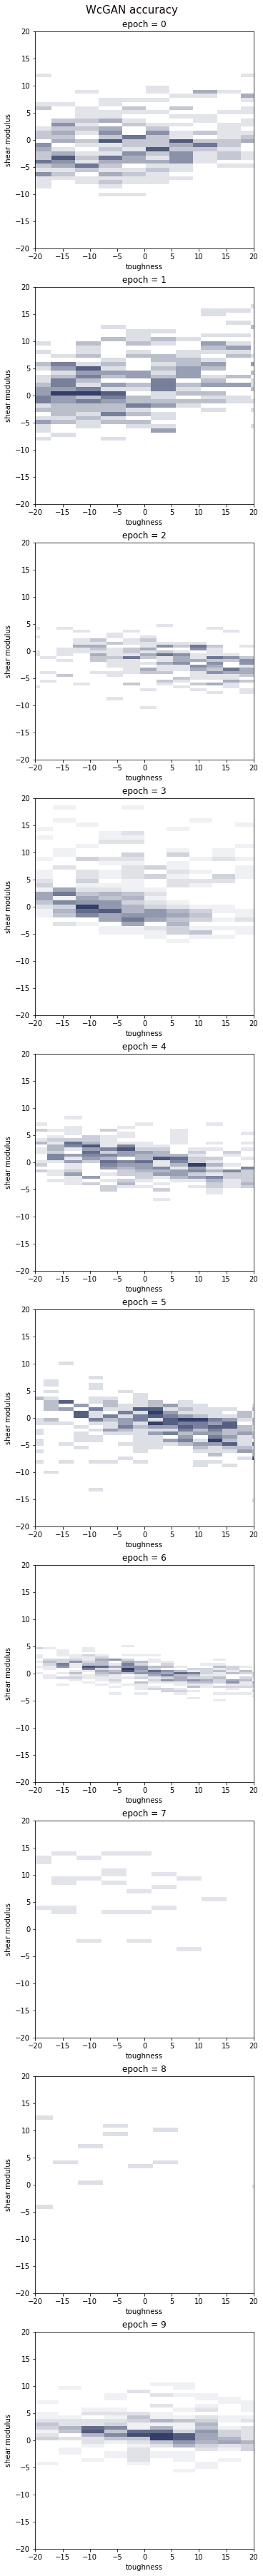

In [9]:
_ = plotting.visilize_accuracy_GAN(WcGAN.samples_real,WcGAN.samples_fake,scaler)

# Plot

## Input dataset

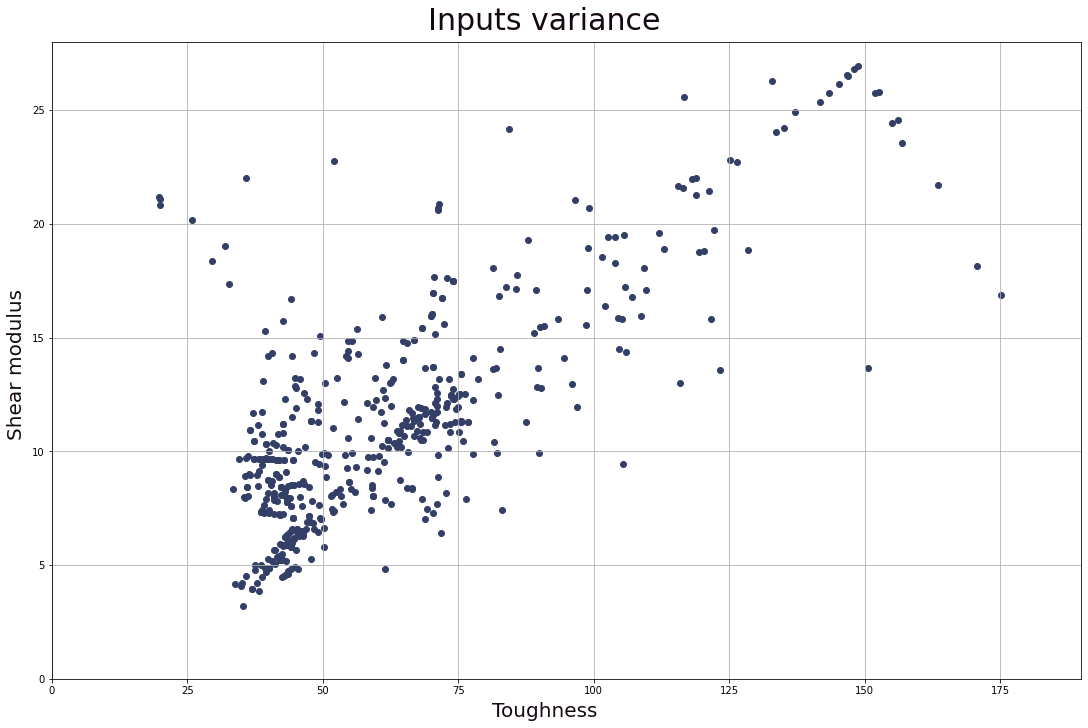

In [10]:
scatter_plot = plotting.input_scatter_plot(properties_values)

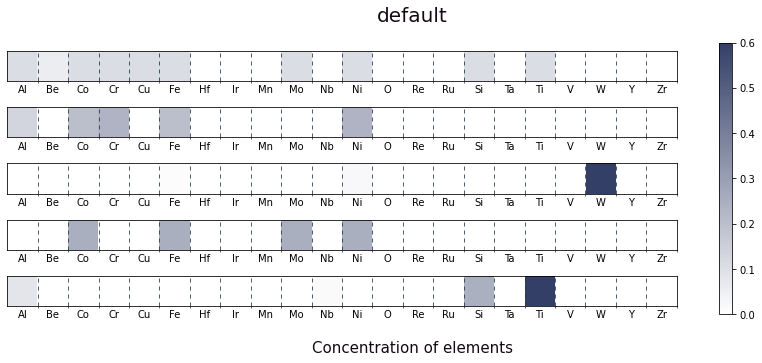

In [12]:
dis_plot = plotting.sample_plot(Training_sequences,dset,interval=10)

## latent space comparision (cAE vs cVAE)

### cAE

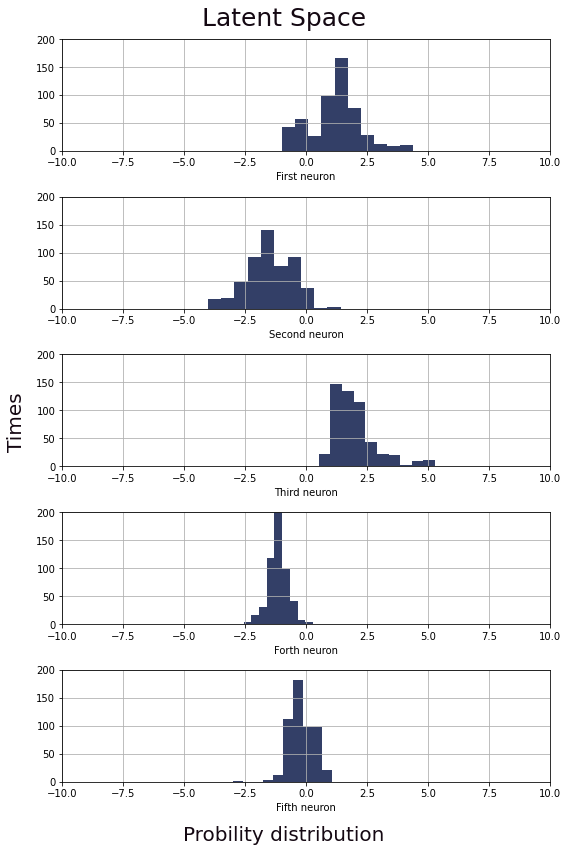

In [13]:
latent_min_Max_collection_cAE,latent_mean_std_collection_cAE,latent_code_cAE=vg.latent_code_inspector_cAE(cAE,Training_sequences,properties_values_scaled)
variance_plot_cAE=plotting.latent_code_variance(latent_code_cAE)

### cVAE

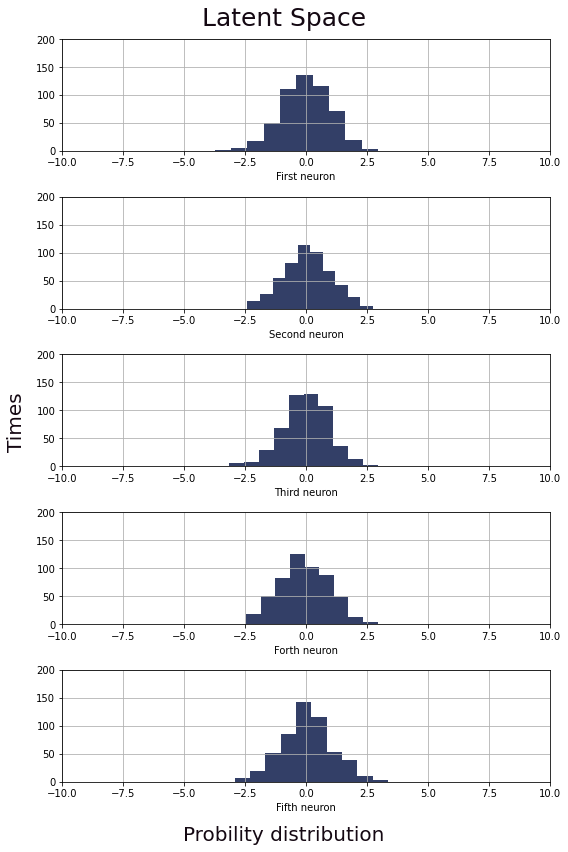

In [14]:
cVAE_min_Max_collection_cVAE,latent_mean_std_collection_cVAE,latent_code_cVAE=vg.latent_code_inspector_cVAE(cVAE,Training_sequences,properties_values_scaled)
variance_plot_cVAE=plotting.latent_code_variance(latent_code_cVAE)

## Mapping plots (cAE vs cVAE vs WcGAN)

### cAE

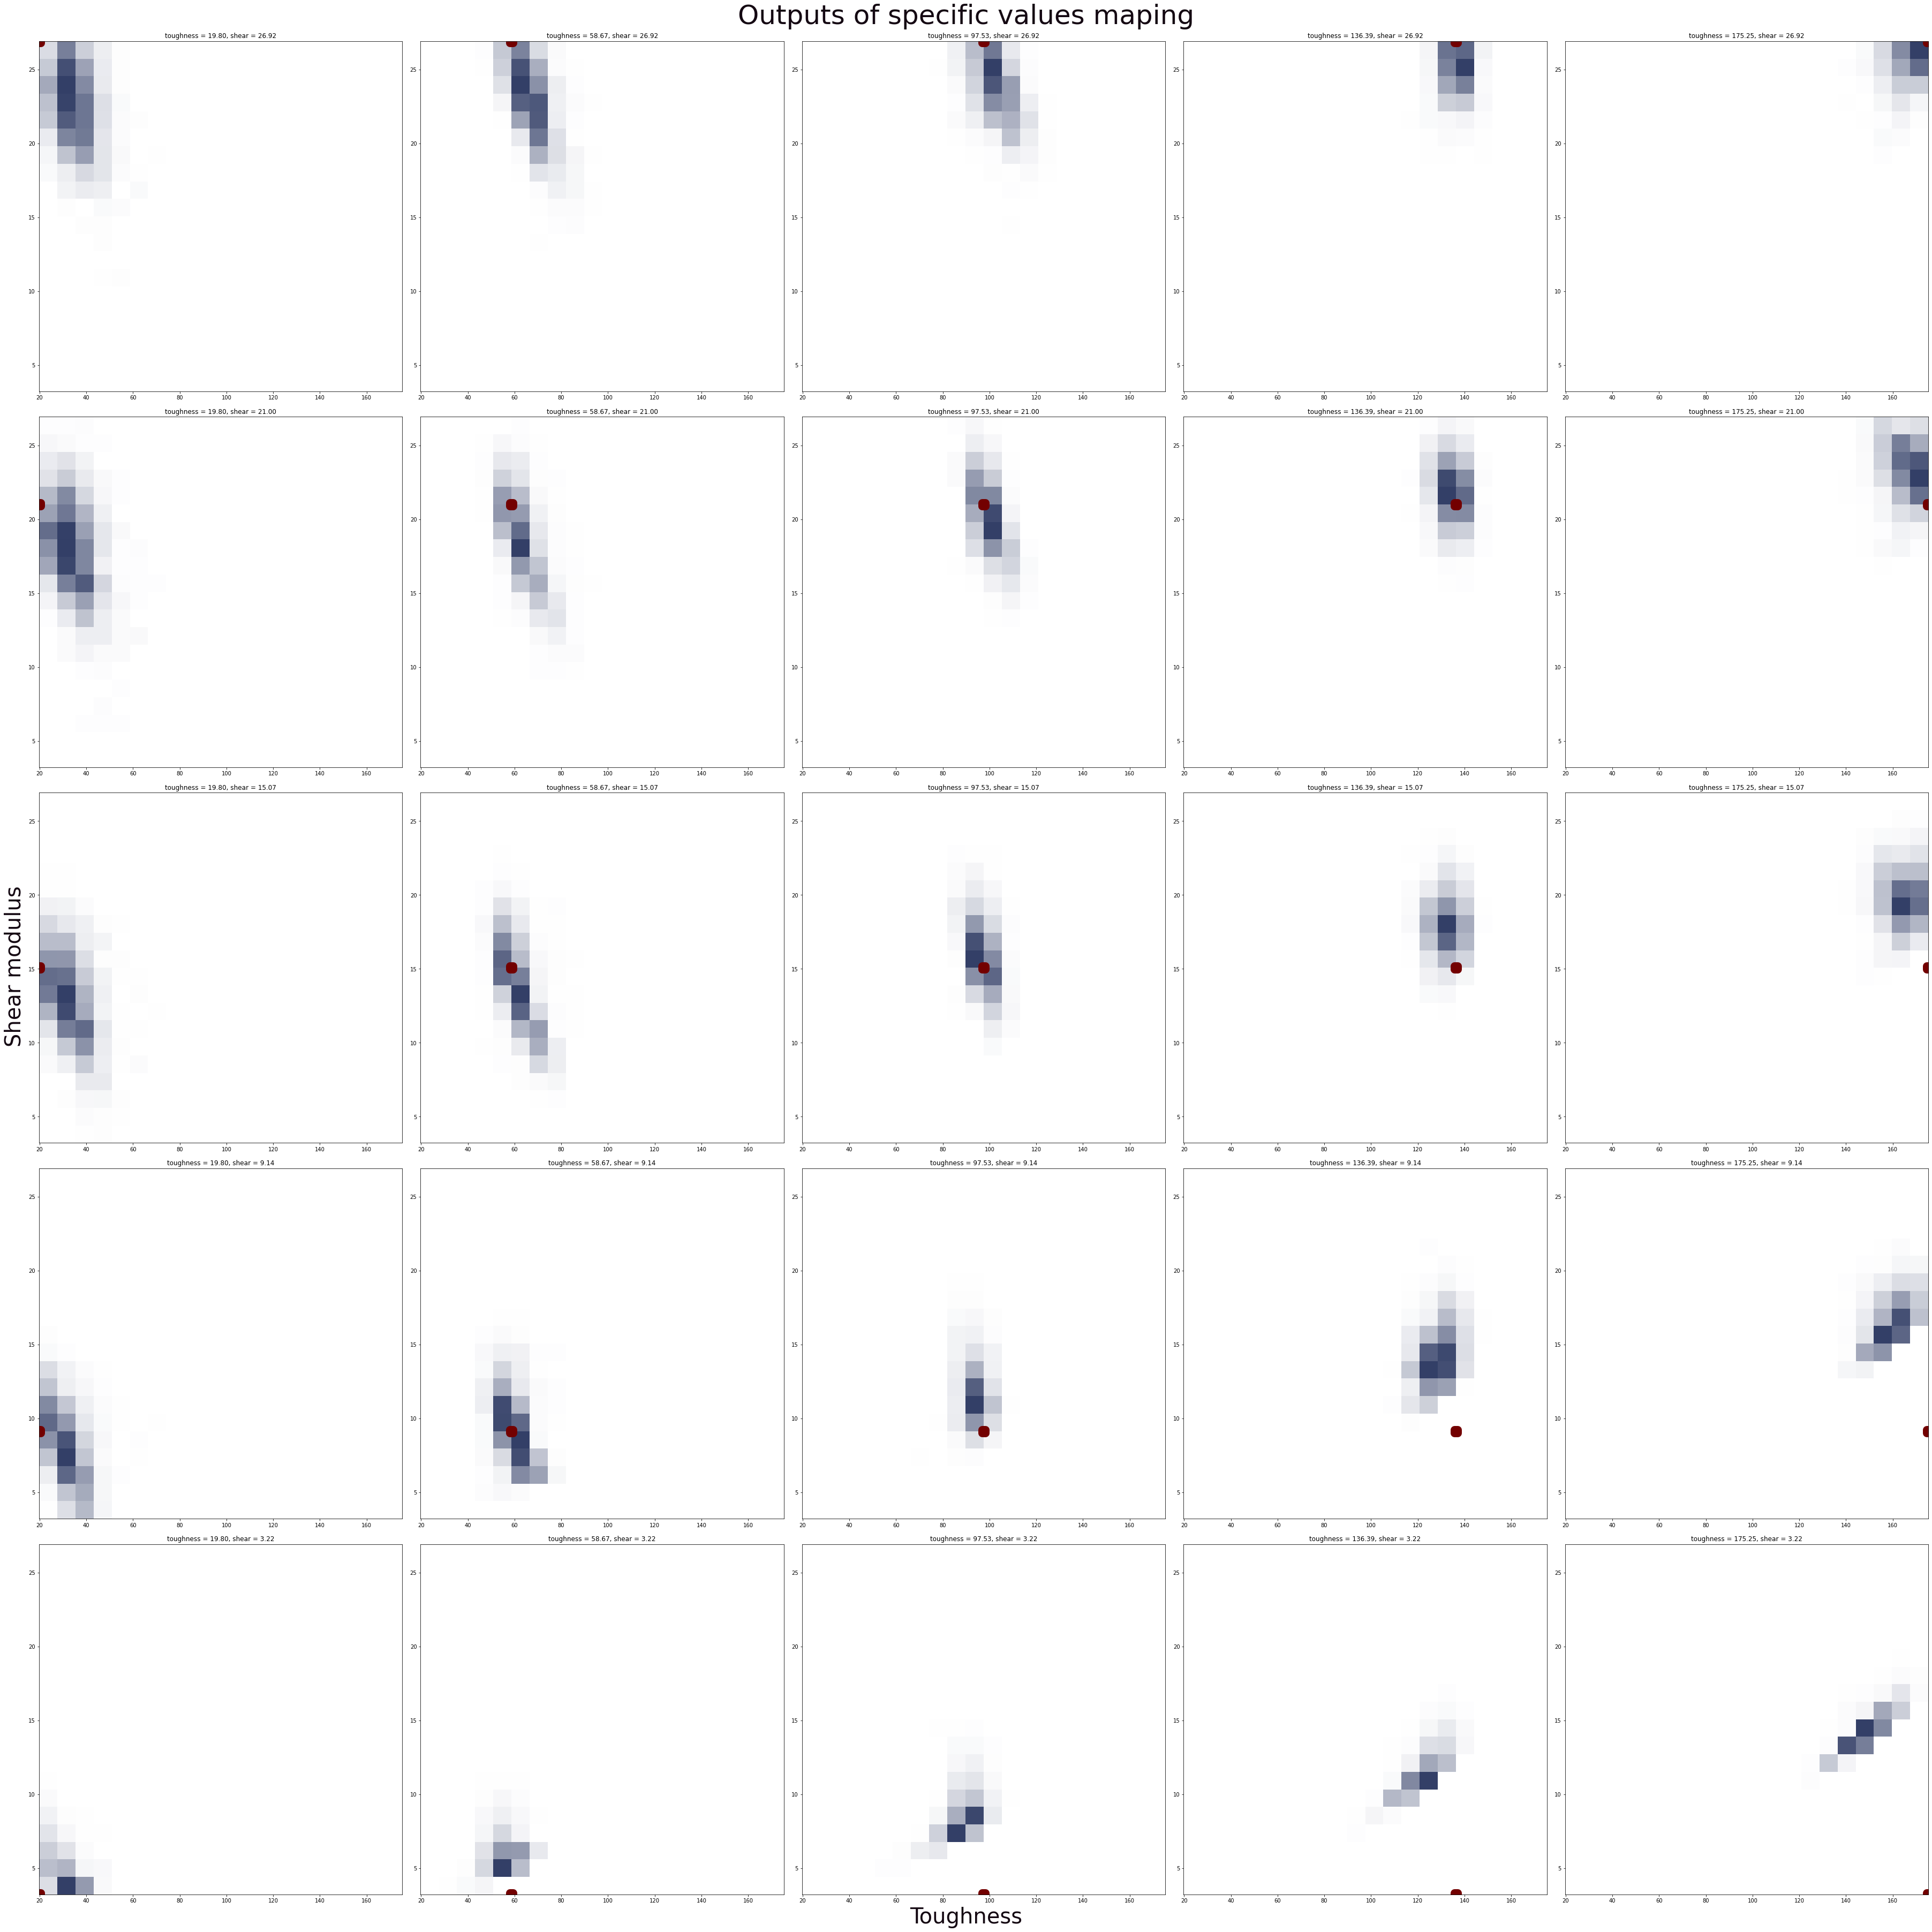

In [16]:
M_cAE_data,M_cAE_conds = vg.preprocess_variance_map_AE(properties_values,latent_mean_std_collection_cAE,scaler,cAE,surrogate_model)
M_cAE =  plotting.variance_map(M_cAE_data,M_cAE_conds)

### cVAE

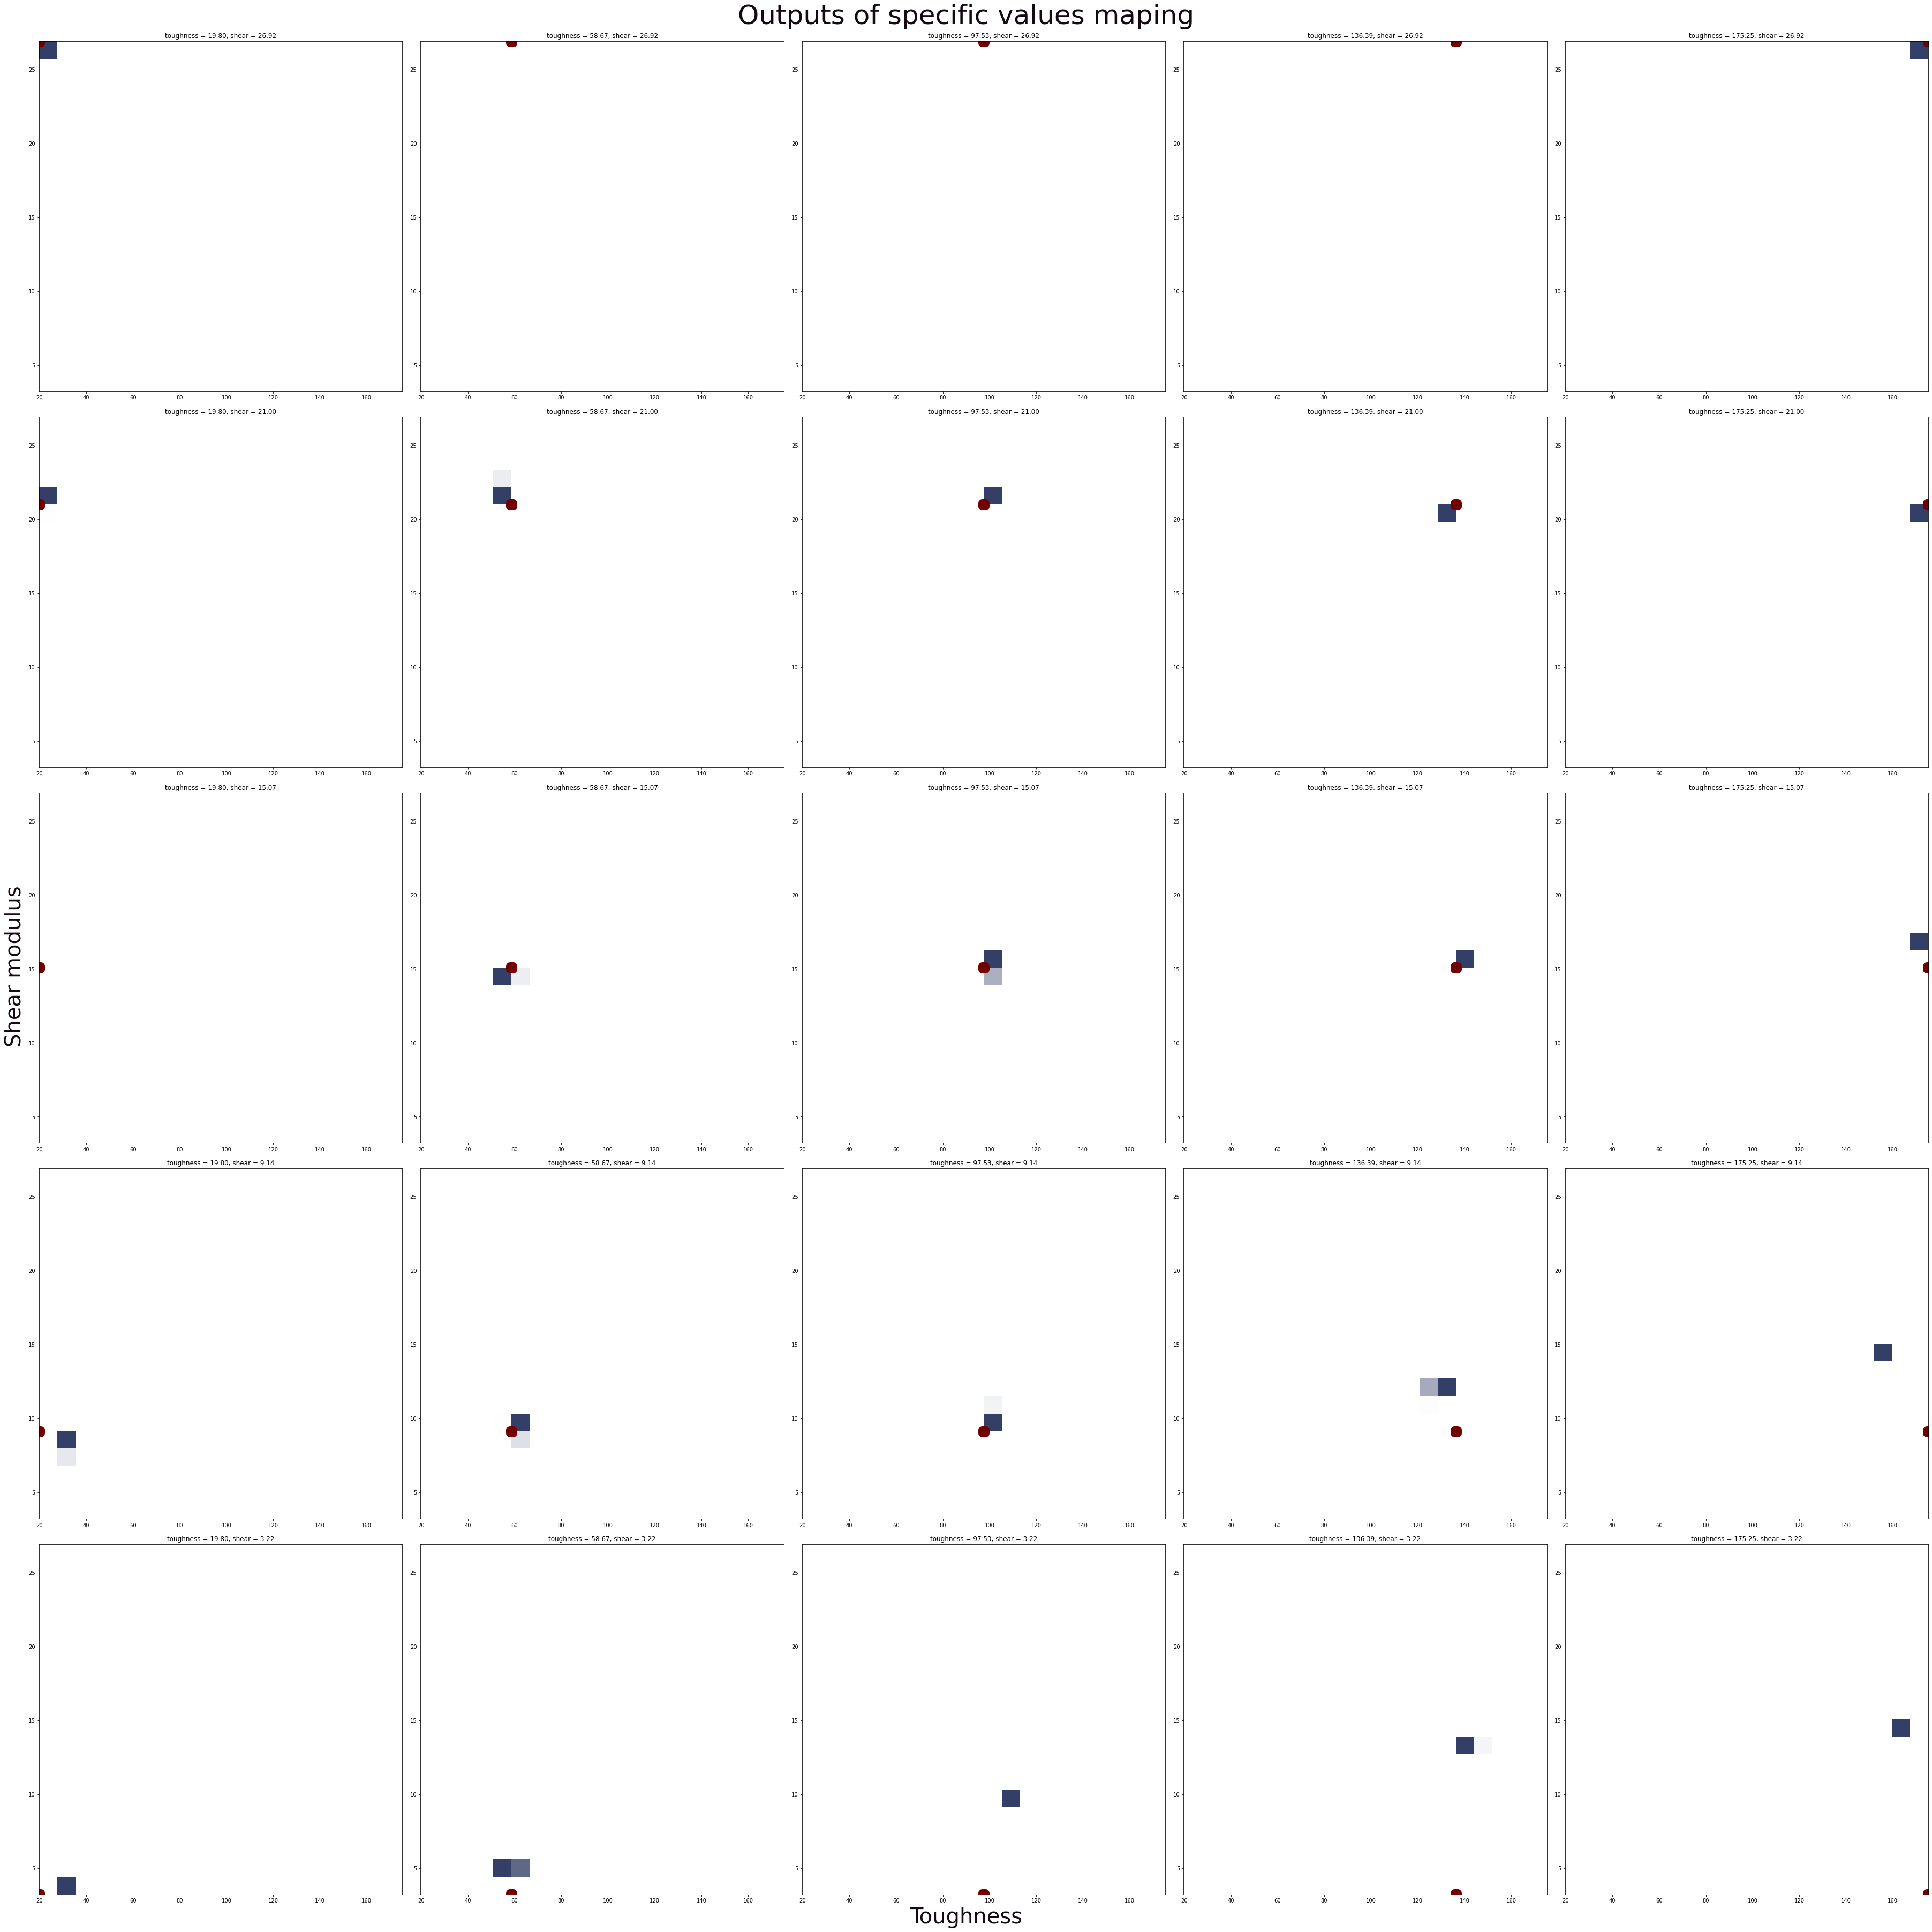

In [17]:
M_cVAE_data,M_cVAE_conds = vg.preprocess_variance_map_AE(properties_values,latent_mean_std_collection_cVAE,scaler,cVAE,surrogate_model)
M_cVAE =  plotting.variance_map(M_cVAE_data,M_cVAE_conds)

### WcGAN

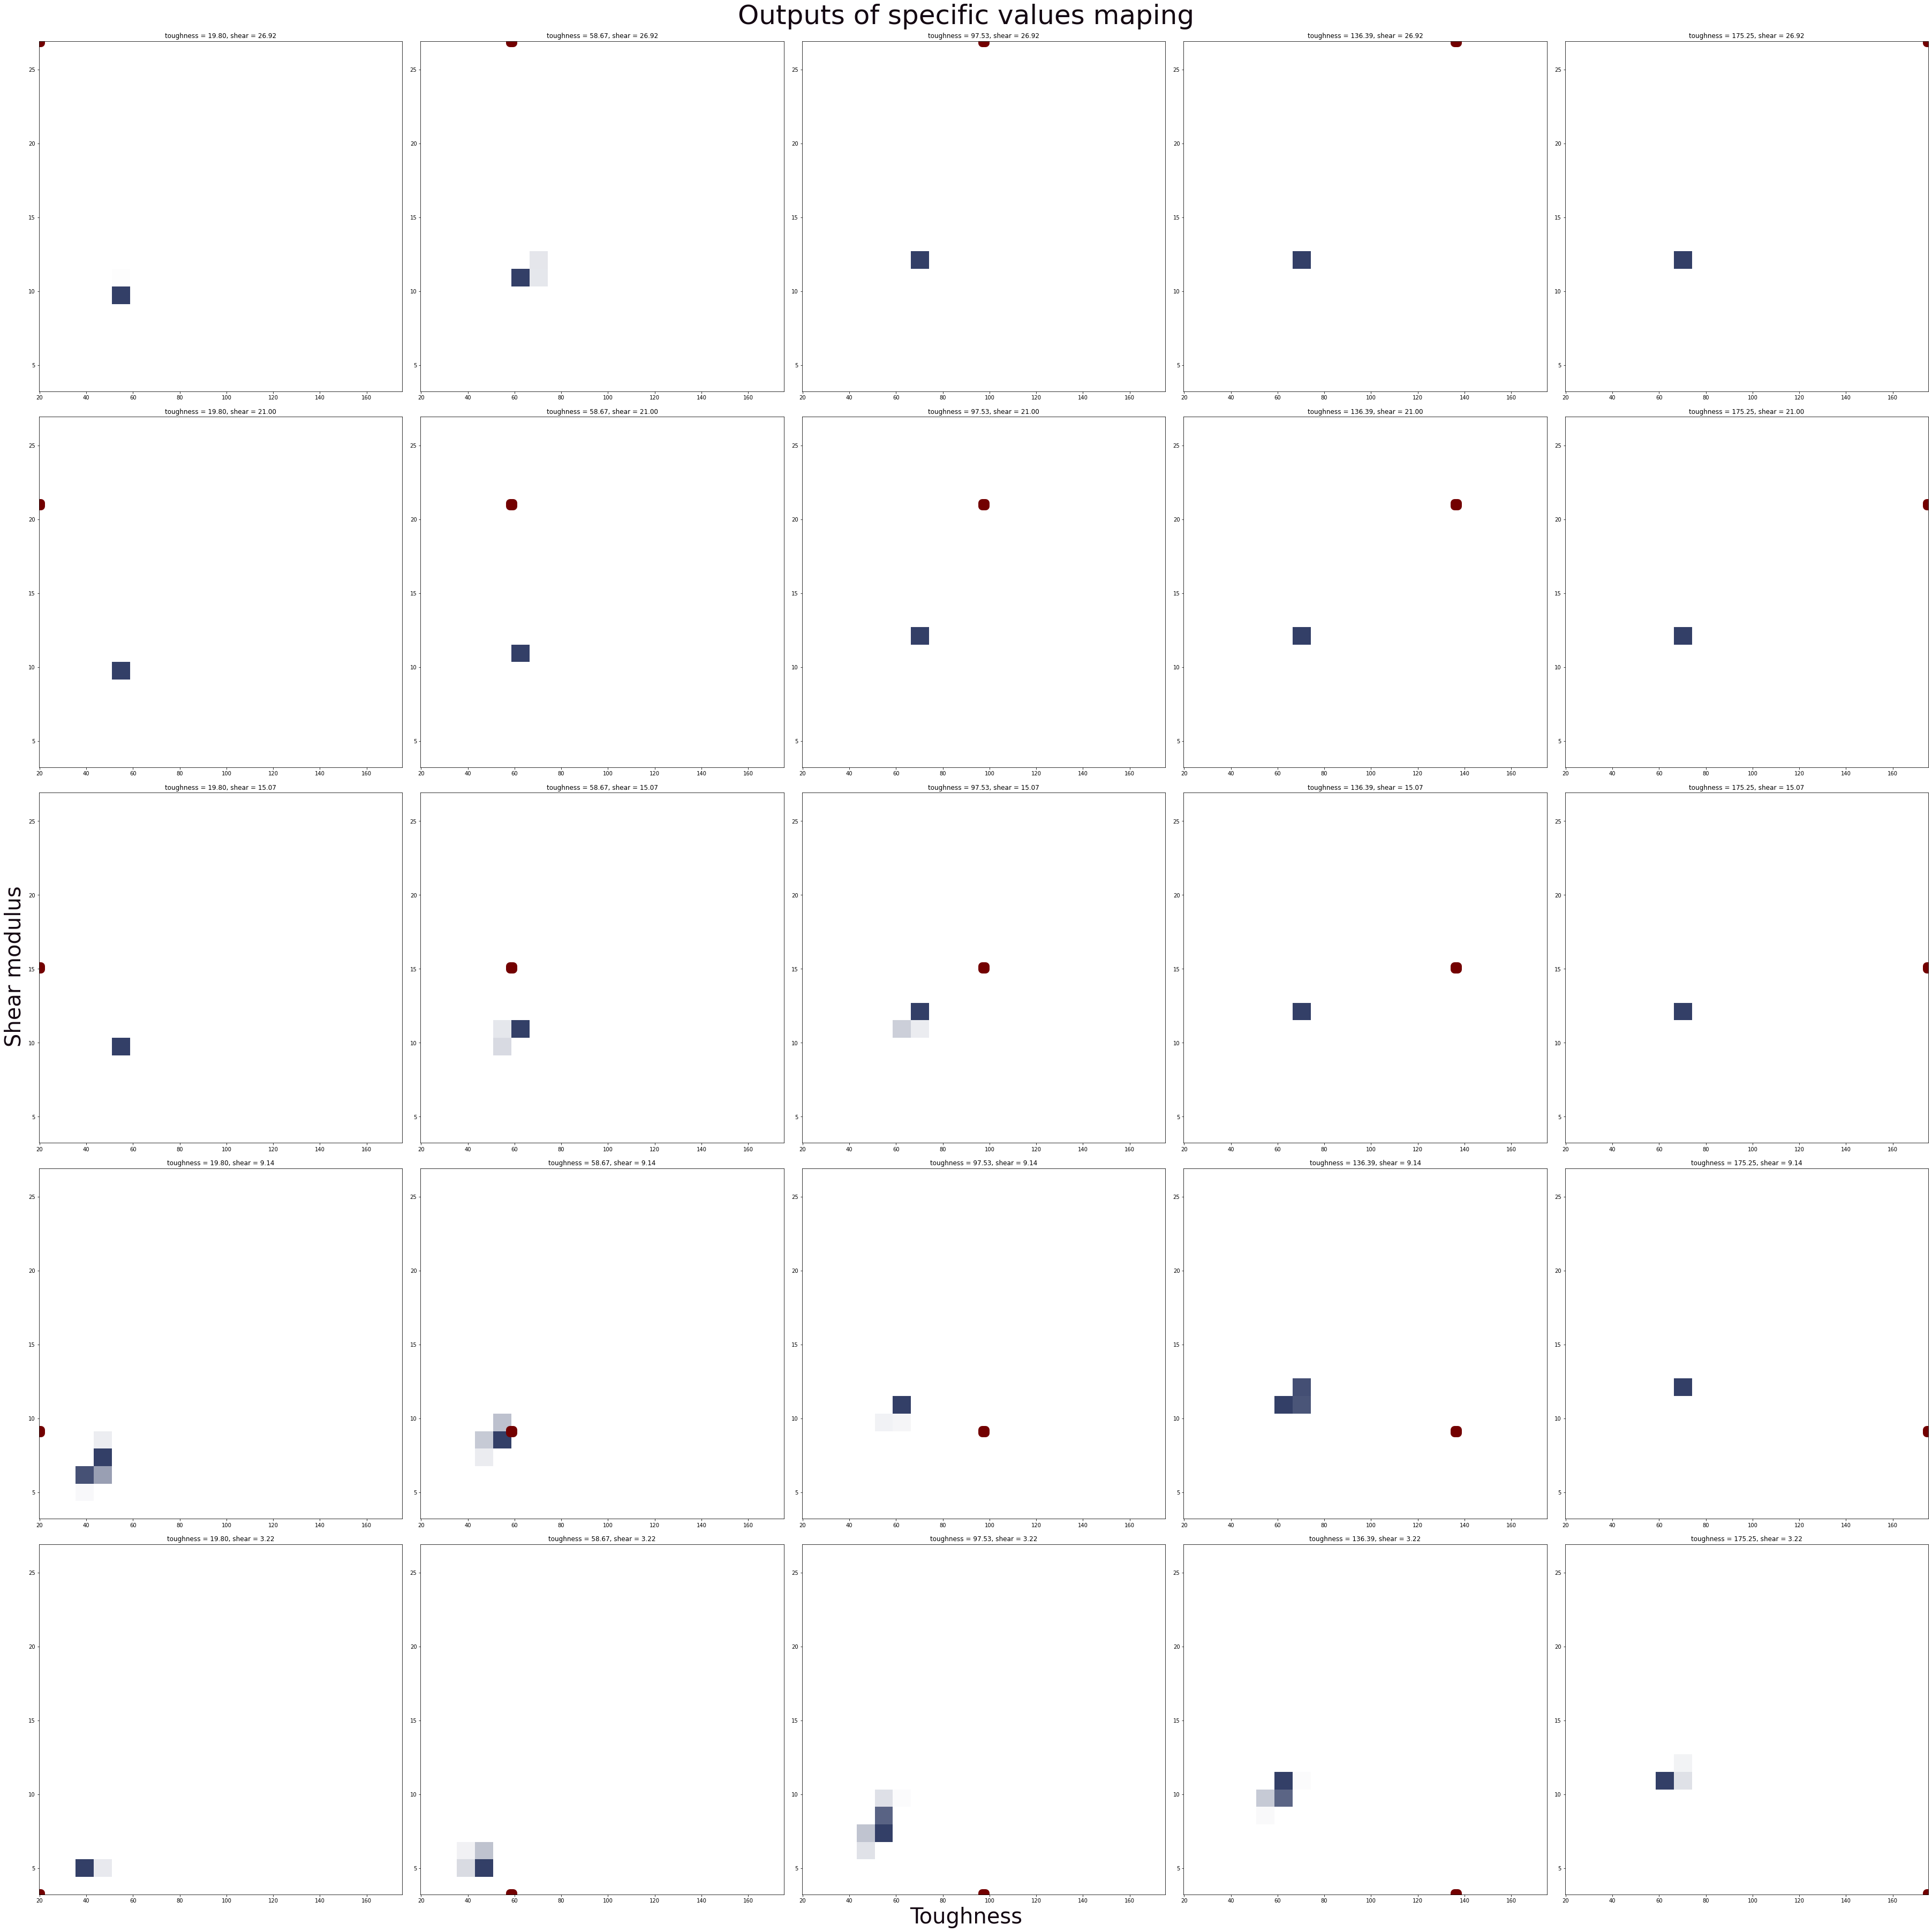

In [18]:
M_GAN_data,M_GAN_conds = vg.preprocess_variance_map_GAN(properties_values,scaler,WcGAN,surrogate_model)
M_GAN = plotting.variance_map(M_GAN_data,M_GAN_conds )

## Violin plots (cAE vs cVAE vs WcGAN)

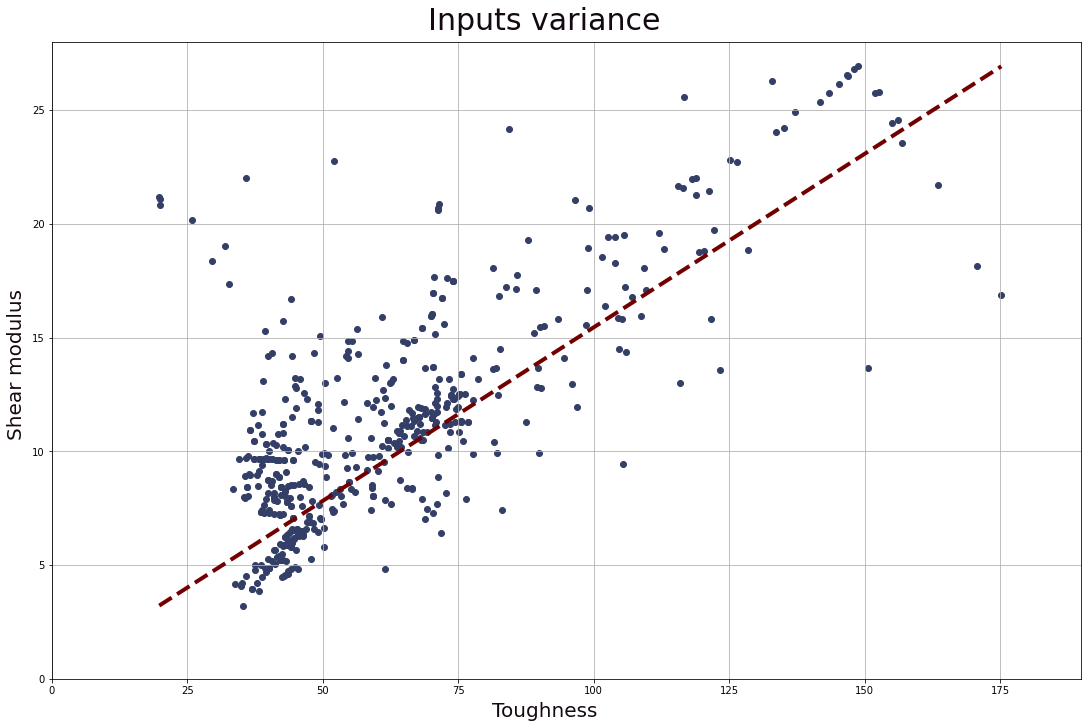

In [19]:
Slice_plot = plotting.input_scatter_plot_slice(properties_values)

### cAE

In [22]:
V_cAE_data,V_cAE_conds = vg.preprocess_violinplot_AE(properties_values,scaler,latent_mean_std_collection_cAE,cAE,surrogate_model)
V_cAE = plotting.violin_plot(V_cAE_data,V_cAE_conds)

### cVAE

In [23]:
V_cVAE_data,V_cVAE_conds = vg.preprocess_violinplot_AE(properties_values,scaler,latent_mean_std_collection_cVAE,cVAE,surrogate_model)
V_cVAE = plotting.violin_plot(V_cVAE_data,V_cVAE_conds)

### WcGAN

In [25]:
V_GAN_data,V_GAN_conds = vg.preprocess_violinplot_GAN(properties_values,scaler,WcGAN,surrogate_model)
V_GAN = plotting.violin_plot(V_GAN_data,V_GAN_conds)

## Random sample (cAE vs cVAE vs WcGAN)

### cAE

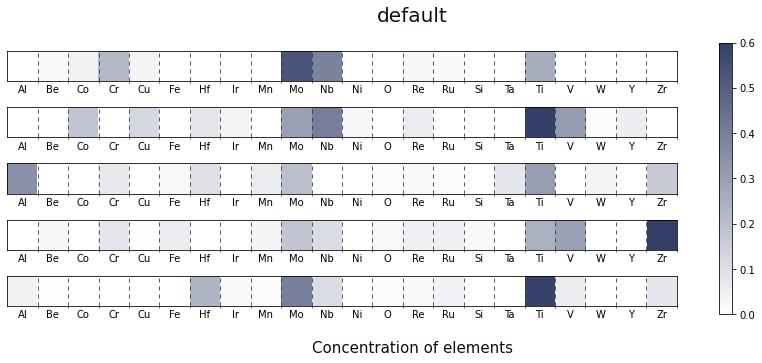

In [44]:
R_cAE_sample,R_cAE_conds = vg.AE_sampler(500,latent_mean_std_collection_cAE,[20,10],scaler,cAE,surrogate_model)
R_cAE = plotting.sample_plot(R_cAE_sample,dset,interval = 10)

### cVAE

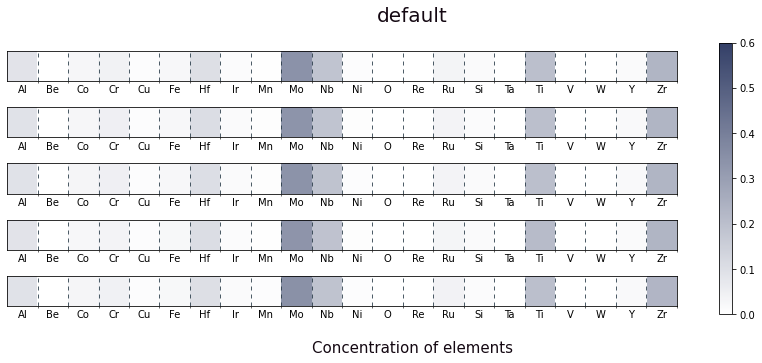

In [ ]:
R_cVAE_sample,R_cVAE_conds = vg.AE_sampler(500,latent_mean_std_collection_cVAE,[20,10],scaler,cVAE,surrogate_model)
R_cVAE = plotting.sample_plot(R_cVAE_sample,dset,interval = 10)

### WcGAN

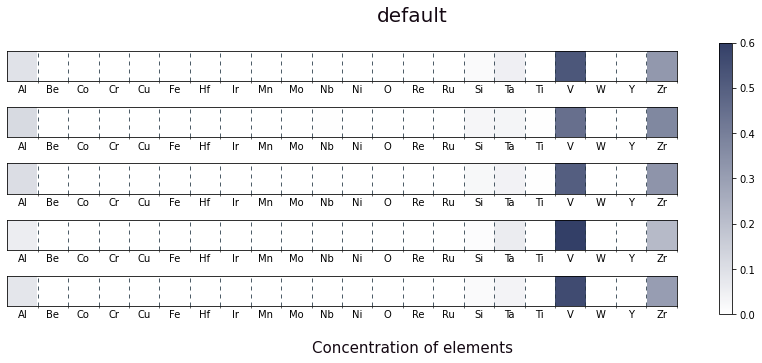

In [55]:
R_cGAN_sample,R_cGAN_conds = vg.g_sample(500,[20,10],WcGAN,surrogate_model,scaler)
R_cGAN = plotting.sample_plot(R_cGAN_sample,dset,interval = 10)

## Interpolation (cAE vs cVAE vs WcGAN)

### cAE

In [ ]:
cAE_interpol = component_variance_plot(create_interpolation_data(cAE.decode,scaler,latent_mean_std_collection_cAE,50,10,interpolation=5),dset,size=1,interval = 1)

### cVAE

In [ ]:
cVAE_interpol = component_variance_plot(create_interpolation_data(cVAE.decode,scaler,latent_mean_std_collection_cVAE,50,10,100,10),dset,interval = 1)

### WcGAN